Task 5: Binary Classification with Logistic Regression:-

i. Load the Breast Cancer Dataset from sklearn.datasets.
ii. Train a logistic regression model to predict whether a tumor is benign or malignant.
iii. Evaluate using:
1. Accuracy
2. Confusion Matrix
3. Precision, Recall, F1-score
4. ROC-AUC curve

In [9]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#` Load the Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)


In [10]:
# Load the dataset
data=load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [11]:
# Display the first few rows of the dataset
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
# Display the target names
ata.target_names

NameError: name 'ata' is not defined

In [ ]:
# Create a DataFrame for easier manipulation
df=pd.DataFrame(data.data,columns=data.feature_names)
df['target'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,"(malignant, benign)"
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
# Checking for missing values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
(malignant, benign)        0
dtype: int64

In [ ]:
input_colms=data.feature_names
output_colms='target'

In [ ]:
X_data=df[input_colms]
Y_data=df[output_colms]

In [ ]:
X_data=X_data.values
Y_data=Y_data.values

In [ ]:
# Splitting the dataset into training and testing sets
print(X_data.shape,Y_data.shape)

(569, 30) (569,)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_data,Y_data,test_size=0.8,random_state=42)

In [ ]:
# Training the Logistic Regression model
model=LogisticRegression(max_iter=100000)
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100000
,multi_class,'deprecated'


In [ ]:
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("Accuracy:",acc)

Accuracy: 0.9692982456140351


In [ ]:
# Classification report
matrix=confusion_matrix(y_test,y_pred)

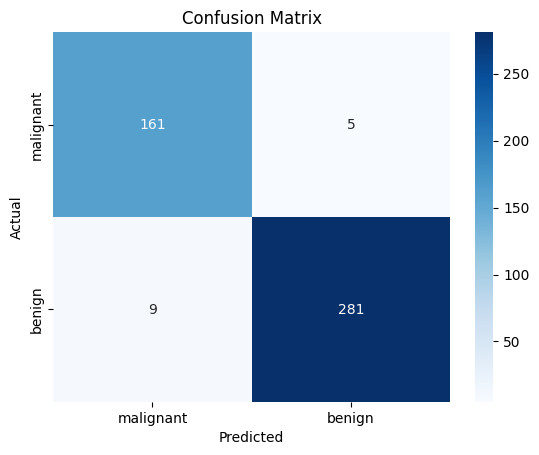

In [ ]:
# Plotting the confusion matrix
sns.heatmap(matrix,annot=True,fmt='d',cmap='Blues',xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# ROC Curve
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.97      0.96       166
      benign       0.98      0.97      0.98       290

    accuracy                           0.97       456
   macro avg       0.96      0.97      0.97       456
weighted avg       0.97      0.97      0.97       456



ROC-AUC Score: 0.9902368093061903


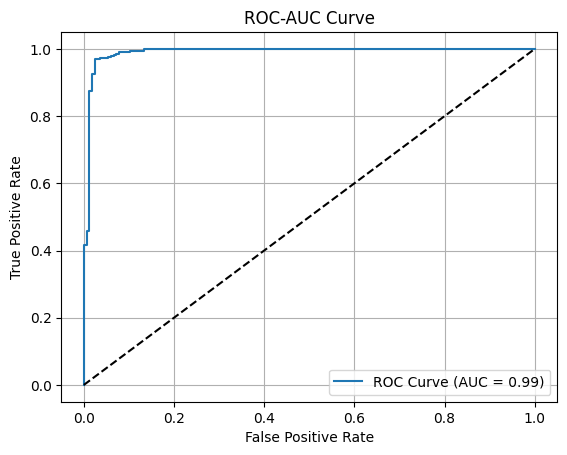

In [ ]:
# Probabilities for ROC
y_probs = model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)
print("ROC-AUC Score:", auc_score)

# Plotting the ROC-AUC curve
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.grid()
plt.show()


In [ ]:

y_probs = model.predict_proba(x_test)[:, 1]
y_probs

array([8.67323043e-01, 7.95642863e-06, 7.67880021e-03, 9.90106873e-01,
       9.99281663e-01, 1.23987914e-08, 1.62089866e-07, 4.53118221e-02,
       8.65872727e-01, 9.45042626e-01, 8.86152708e-01, 9.19337085e-03,
       9.21146357e-01, 3.98090012e-01, 9.93782709e-01, 8.42924803e-03,
       9.87257264e-01, 9.99961175e-01, 9.99999655e-01, 1.23561689e-04,
       4.30613708e-01, 9.76032435e-01, 3.12756969e-06, 9.99549987e-01,
       9.93968208e-01, 9.98477840e-01, 9.86659877e-01, 9.99070746e-01,
       9.84034222e-01, 1.64663862e-06, 9.97866248e-01, 9.98324456e-01,
       9.99851241e-01, 9.17125412e-01, 9.99758075e-01, 9.98417331e-01,
       6.64702852e-03, 9.98892197e-01, 7.71633698e-05, 7.17910740e-01,
       9.99678490e-01, 9.12664262e-03, 9.98225989e-01, 9.90575552e-01,
       9.99781113e-01, 9.80218553e-01, 9.99960574e-01, 9.99861842e-01,
       9.43440021e-01, 9.92269437e-01, 6.22905450e-04, 1.56039144e-06,
       6.19704200e-01, 9.98101989e-01, 9.98165664e-01, 9.50663608e-01,
      

Task 6: Threshold Tuning and Probability Interpretation
i. Predict the probability of the positive class.
ii. Change the threshold (e.g., 0.3, 0.5, 0.7) and observe how the confusion matrix and F1-score change.
iii. Plot the ROC curve and mark optimal threshold.

In [ ]:
# Train Logistic Regression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, f1_score, roc_curve, roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # probabilities for class 1 (benign)



In [ ]:
#Change Thresholds 

def new_threshold(threshold):
    y_probs_new=(y_probs>=threshold).astype(int)
    matrix=confusion_matrix(y_test,y_probs_new)
    # See Confusion Matrix & F1-score
    f1=f1_score(y_test,y_probs_new)
    print(f"\nThreshold: {threshold}")
    print("Confusion Matrix:\n", matrix)
    print("F1 Score:", f1)
    print("Classification Report:\n", classification_report(y_test, y_probs_new))

for t in [0.3, 0.5, 0.7]:
    new_threshold(t)



Threshold: 0.3
Confusion Matrix:
 [[39  4]
 [ 1 70]]
F1 Score: 0.9655172413793104
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Threshold: 0.5
Confusion Matrix:
 [[39  4]
 [ 1 70]]
F1 Score: 0.9655172413793104
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Threshold: 0.7
Confusion Matrix:
 [[41  2]
 [ 1 70]]
F1 Score: 0.9790209790209791
Classification Report:
               precision  

[           inf 9.99999400e-01 8.50895700e-01 7.27571466e-01
 7.19277990e-01 1.75825070e-01 8.20689706e-02 7.69730956e-25]
[0.         0.         0.         0.04651163 0.04651163 0.11627907
 0.11627907 1.        ]
[0.         0.01408451 0.97183099 0.97183099 0.98591549 0.98591549
 1.         1.        ]


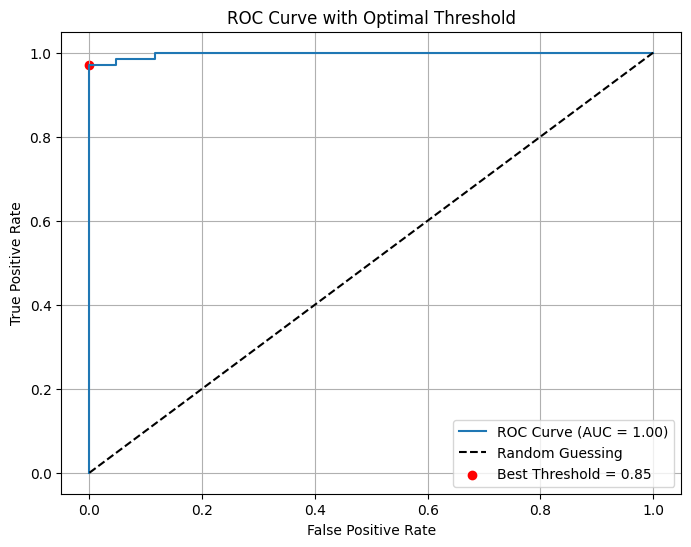

In [ ]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)
print(thresholds)
print(fpr)
print(tpr)

# Compute F1 scores for all thresholds
f1_scores = []
for thresh in thresholds:
    y_pred = (y_probs >= thresh).astype(int)
    f1_scores.append(f1_score(y_test, y_pred))

optimal_idx = np.argmax(f1_scores)
optimal_thresh = thresholds[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]

# Print optimal threshold and F1 score
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f"Best Threshold = {optimal_thresh:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with Optimal Threshold")
plt.legend()
plt.grid()
plt.show()


1.What are the key assumptions behind linear regression?
->Linear regression relies on several assumptions: it presumes a straight-line relationship between input features and the target, constant variance in error terms (homoscedasticity), independent data points, no strong correlation (multicollinearity) among predictors, and that residuals follow a normal distribution.

2.When is logistic regression preferred over linear regression?
->Logistic regression is the go-to method when the target variable is categorical — especially for binary outcomes like "yes/no" or "0/1." In contrast, linear regression is appropriate when the goal is to predict a continuous numerical value.

3.How do you interpret coefficients in a logistic regression model?
->Each coefficient in logistic regression indicates the effect of a one-unit increase in the predictor variable on the log-odds of the target event occurring, assuming all other predictors are held constant.

4.What distinguishes the sigmoid function from the softmax function?
->The sigmoid function compresses any input to a value between 0 and 1, making it ideal for binary classification. The softmax function, however, is used in multi-class problems and returns a probability distribution across all classes, where the probabilities add up to 1.

5.Why is R² not a suitable metric for logistic regression?
->R-squared is designed for linear regression and reflects the percentage of variance in a continuous outcome that is explained by the model. Since logistic regression predicts categorical outcomes, it's better evaluated using metrics such as accuracy, recall, precision, or AUC-ROC.